In [2]:
from gymnasium import Env
from gymnasium.spaces import Box, Discrete
import numpy as np

In [4]:
observation_space = Box(low=np.array([0]), high=np.array([10]), shape = (1,), dtype=np.int16)
observation_space

Box(0, 10, (1,), int16)

In [5]:
observation_space.shape

(1,)

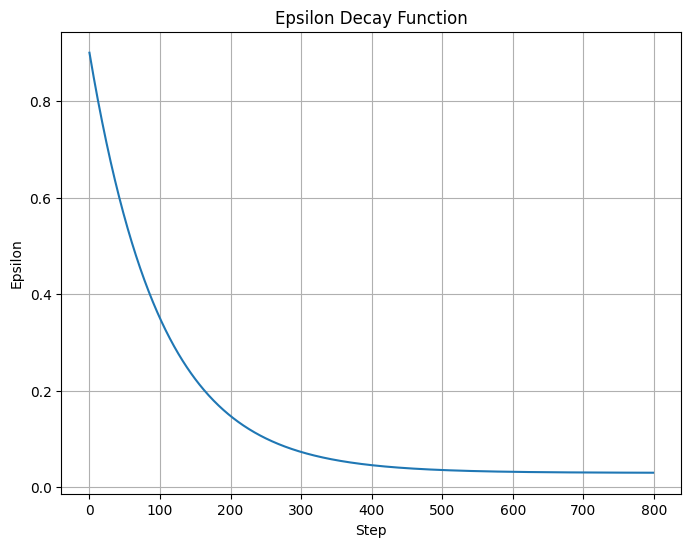

In [18]:
import matplotlib.pyplot as plt
import math

# Define the function
def epsilon_decay(x):
    EPS_START = 0.9
    EPS_END = 0.03
    EPS_DECAY = 100
    return EPS_END + (EPS_START - EPS_END) * np.exp(-1. * x / EPS_DECAY)

# Generate x values
x = range(0, 800)  # You can adjust the range as needed

# Calculate y values using the function
y = [epsilon_decay(xi) for xi in x]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlabel('Step')
plt.ylabel('Epsilon')
plt.title('Epsilon Decay Function')
plt.grid(True)

# Show the plot
plt.show()

In [13]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


x = torch.tensor([[2.0,5.0,2.0],[4.0,5.0,4.0]])
y = torch.tensor([[1],[1]])
print(x[y])

x = torch.tensor([[2.0,5.0,2.0]])
y = torch.tensor([1])
print(x[y])

tensor([[[4., 5., 4.]],

        [[4., 5., 4.]]])


IndexError: index 1 is out of bounds for dimension 0 with size 1

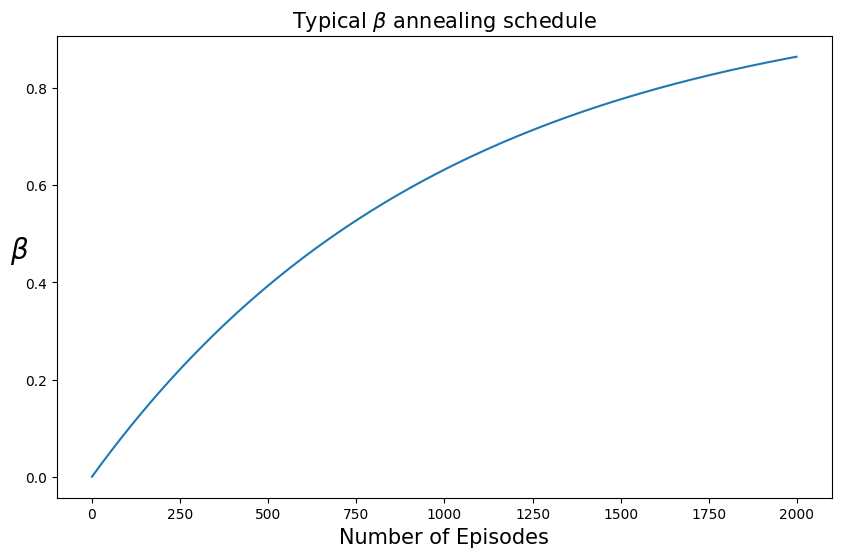

In [3]:
import matplotlib.pyplot as plt
import numpy as np
def exponential_annealing_schedule(n, rate):
    return 1 - np.exp(-rate * n)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ns = np.arange(2000)
rate = 1e-3
_ = ax.plot(ns, exponential_annealing_schedule(ns, rate))
_ = ax.set_ylabel(r"$\beta$", rotation="horizontal", fontsize=20)
_ = ax.set_xlabel("Number of Episodes", fontsize=15)
_ = ax.set_title(r"Typical $\beta$ annealing schedule", fontsize=15)

In [40]:
from numpy import random
class Test():
    def __init__(self, seed = 42):
        random.seed(seed)
        pass

    def calculate_random_integer(self):
        return random.randint(0,10)

test = Test()
print(test.calculate_random_integer())
print(test.calculate_random_integer())

6
3


In [68]:
import numpy as np
from numpy import random

a = np.array([378.31,3.11,92.2])
b = np.array([(0.027160561080834984,0.1938059167167128),(0.015649339243994923,0.05599971858005176),(0.003897539654922594,0.010297427507850577)])
random.seed(7)

def calculate_next_price(last_value, t):
    avg_gbm, std_gbm = t
    return last_value * np.exp((avg_gbm - (std_gbm ** 2) / 2) + std_gbm * random.normal())

# Apply calculate_next_price to each element of a with the respective tuple in b
for i in range(6):
    a = calculate_next_price(a, b.T)
    print(a)

[529.39139928   3.46728908  94.18045892]
[487.75187256   3.42589256  94.09070675]
[494.99504627   3.4808667   94.48506379]
[540.18248421   3.61171766  95.24787056]
[467.49528346   3.50463141  94.84114185]
[471.61820685   3.55474162  95.20848748]


In [76]:
a = np.array([378.31,3.11,92.2])
b = np.array([10,0.5,3])
random.seed(7)
for i in range(6):
    print(random.normal(a,b))

[395.21525704   2.87703131  92.29846049]
[382.38516283   2.71553849  92.20619672]
[378.30109614   2.23263785  95.25297402]
[384.31498516   2.79728551  91.68535522]
[383.36299374   2.97932179  91.47175276]
[363.77758588   3.38729016  92.57164272]


In [5]:
import numpy as np
action = 2
AP = 2
last_crops = np.array([None,None,3,3,3])

print(np.where(last_crops[-AP:]==action))
    

(array([], dtype=int64),)


In [69]:
def get_penalty(last_crops_orig,action,AP):
    penalty = 1.0
    last_crops = np.append(last_crops_orig,[action])
    i = 0
    while len(last_crops)-i-1 >= 0:
        window_start = max(0,len(last_crops)-AP-i-1)
        window_end = len(last_crops)-i-1
        test = (last_crops[window_end],window_end)
        if last_crops[window_end] != action:
            i+=1
            continue
        break_indices = np.where(last_crops[window_start:window_end]==action)[0]
        if len(break_indices) != 0:
            last_break_index = break_indices[-1]
            penalty *= 1-0.1*AP*(last_break_index+1)/AP
            i+=1
        else:
            i+=1
            break
    return penalty

import numpy as np
action = 1
AP = 3
last_crops_list = np.array([[None,None,None,None,None],[1,1,1,1,1],[None,3,3,1,1],[None,None,1,3,1],[None,1,3,1,1],[None,None,3,1,3],[3,1,1,3,3],[1,1,1,3,1]]) #
for last_crops_orig in last_crops_list:
    penalty = get_penalty(last_crops_orig,action, AP)
    print(last_crops_orig, np.round(penalty,3))
# last_crops = last_crops_list[0]



    

[None None None None None] 1.0
[1 1 1 1 1] 0.247
[None 3 3 1 1] 0.49
[None None 1 3 1] 0.56
[None 1 3 1 1] 0.392
[None None 3 1 3] 0.8
[3 1 1 3 3] 0.72
[1 1 1 3 1] 0.403


In [67]:
ts = [(2,1,2),(2,1,3),(3,1,3),(2,1,4),(3,1,4),(4,1,4),(3,2,4),(4,2,4),(4,3,4)]
for t in ts:
    count, mf_group_max_count, mf_group_window_length = t
    penalty = 1-(count/mf_group_window_length - mf_group_max_count/mf_group_window_length)
    print(t, penalty)

(2, 1, 2) 0.5
(2, 1, 3) 0.6666666666666667
(3, 1, 3) 0.33333333333333326
(2, 1, 4) 0.75
(3, 1, 4) 0.5
(4, 1, 4) 0.25
(3, 2, 4) 0.75
(4, 2, 4) 0.5
(4, 3, 4) 0.75


In [75]:
def get_multi_AP_penalty(last_crops_orig,action,AP, relevant_crops):
    penalty = 1.0
    last_crops = np.append(last_crops_orig,[action])
    i = 0
    while len(last_crops)-i-1 >= 0:
        window_start = max(0,len(last_crops)-AP-i-1)
        window_end = len(last_crops)-i-1
        if last_crops[window_end] not in relevant_crops:
            i+=1
            continue
        break_indices = np.where(np.isin(last_crops[window_start:window_end],relevant_crops))[0]
        if len(break_indices) != 0:
            last_break_index = break_indices[-1]
            penalty *= 1-0.1*AP*(last_break_index+1)/AP
            i+=1
        else:
            i+=1
            break
    return penalty

import numpy as np
action = 1
relevant_crops = [1,2,4]
AP = 3
last_crops_list = np.array([[None,None,None,None,None],[1,1,1,1,1],[1,2,2,1,1],[None,3,3,2,1],[None,3,3,4,1],[None,None,2,3,1],[None,4,3,2,1],[None,None,3,4,3],[3,2,1,3,3],[4,4,2,3,1]]) #
for last_crops_orig in last_crops_list:
    penalty = get_multi_AP_penalty(last_crops_orig,action, AP, relevant_crops)
    print(last_crops_orig, np.round(penalty,3))

[None None None None None] 1.0
[1 1 1 1 1] 0.247
[1 2 2 1 1] 0.247
[None 3 3 2 1] 0.49
[None 3 3 4 1] 0.49
[None None 2 3 1] 0.56
[None 4 3 2 1] 0.392
[None None 3 4 3] 0.8
[3 2 1 3 3] 0.72
[4 4 2 3 1] 0.403


In [13]:
import numpy as np
week = 10.
latest_sowing = 5.
print(max(0.0,1.+((latest_sowing - 1. - week)*0.2)))

-0.20000000000000018
0.0


In [12]:
import numpy as np
a = np.zeros((2,3))
b = 2

a = a[1:,:]
print(a)
print(a.shape)
bm = np.zeros((1,a.shape[1]))
bm[0,b] = 1
print(np.concatenate((a,bm),axis=0))

[[0. 0. 0.]]
(1, 3)
[[0. 0. 0.]
 [0. 0. 1.]]


In [21]:
import numpy as np

a = np.array([[1, 2, 3, 4, 5]])
b = np.array([0, 1, 2]).reshape((1,3))
print(b)
mask = np.ones_like(a, dtype=bool)
print(mask)
mask[0][b] = False
a[~mask] = 0

print(a)

[[0 1 2]]
[[ True  True  True  True  True]]
[[0 0 0 4 5]]


c:\Users\Magnus\Documents\GitHub\cro_symbolic_mbpo


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'KLEEGRAS'),
  Text(1, 0, 'LUZERNE'),
  Text(2, 0, 'ACKERBOHNE'),
  Text(3, 0, 'KOERNERERBSE'),
  Text(4, 0, 'SOJABOHNE'),
  Text(5, 0, 'FUTTERLUPINE'),
  Text(6, 0, 'WINTERWEIZEN'),
  Text(7, 0, 'SOMMERWEIZEN'),
  Text(8, 0, 'WINTERHARTWEIZEN'),
  Text(9, 0, 'WINTERDINKEL'),
  Text(10, 0, 'WINTERTRITICALE'),
  Text(11, 0, 'WINTERROGGEN'),
  Text(12, 0, 'WINTERGERSTE'),
  Text(13, 0, 'SOMMERGERSTE'),
  Text(14, 0, 'SOMMERHAFER'),
  Text(15, 0, 'HIRSE'),
  Text(16, 0, 'SILOMAIS'),
  Text(17, 0, 'KOERNERMAIS'),
  Text(18, 0, 'ZUCKERRUEBEN'),
  Text(19, 0, 'KARTOFFELN'),
  Text(20, 0, 'WINTERRAPS'),
  Text(21, 0, 'SONNENBLUMEN'),
  Text(22, 0, 'OELKUERBIS'),
  Text(23, 0, 'GRASSILAGE')])

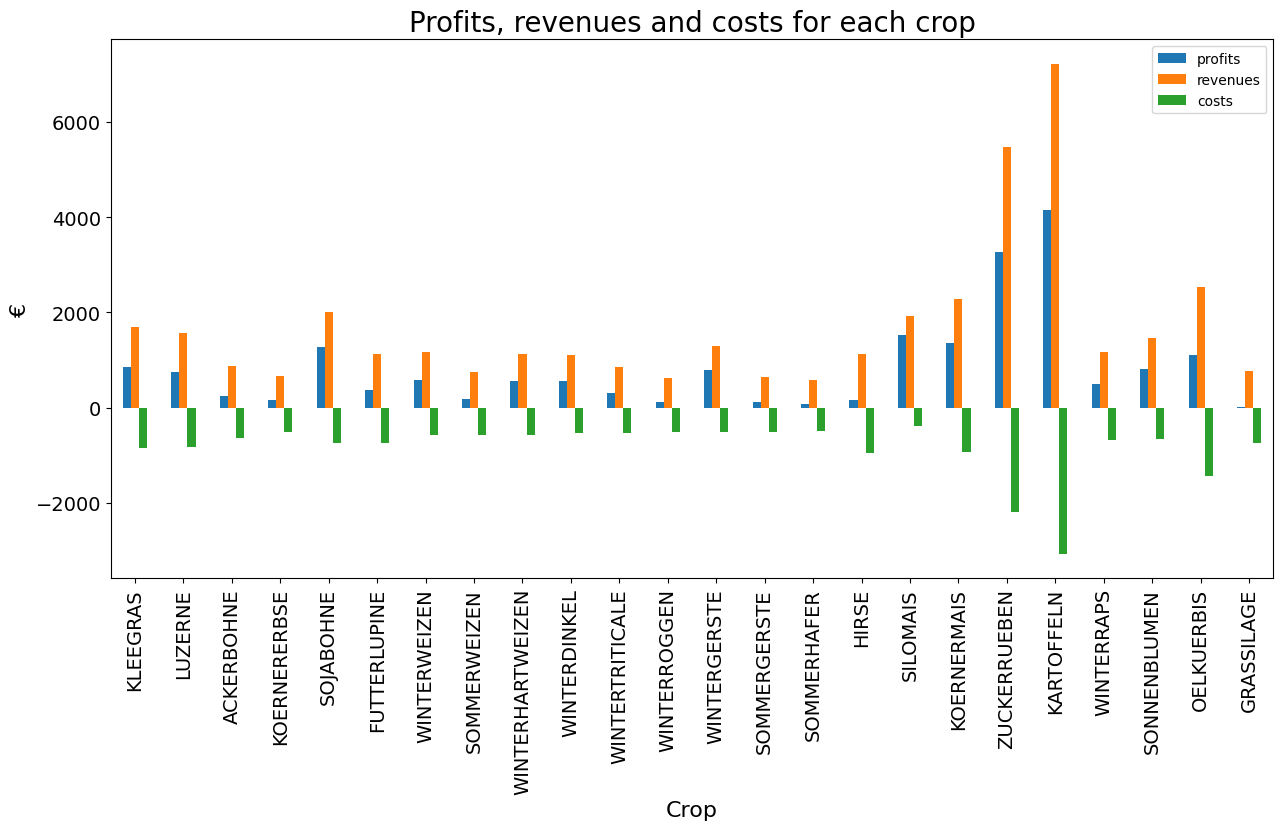

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
from numpy import random
from simulation_env.environment_maincrops.data.mappings import crop_mapping_german, crop_mapping_german_rev, crop_mapping_eng, date_mapping, date_mapping_rev
region = "Bundesgebiet"
print(os.getcwd())
json_file_path = "./simulation_env/environment_maincrops/data/maincrops_updated.json"
# Open and read the JSON file
with open(json_file_path, "r") as json_file:
    # Parse the JSON data into a Python dictionary
    maincrop_yields = json.load(json_file)
seed = 42
N=50
P=0
K=0
yields = np.array([random.normal(maincrop_yields[crop_name]["Ertrag"][region]["avg"], maincrop_yields[crop_name]["Ertrag"][region]["std"]) for crop_name in maincrop_yields.keys()])
prices_avg = np.array([crop["Verkaufspreis"]["avg"] for crop in maincrop_yields.values()])
prices_std = np.array([crop["Verkaufspreis"]["std"] for crop in maincrop_yields.values()])
prices = random.normal(prices_avg,prices_std)
sowing_costs_avg = np.array([crop["Kosten"]["Saatgut"]["avg"] for crop in maincrop_yields.values()])

other_costs_avg = np.array([crop["Kosten"]["Sonstiges"]["avg"] for crop in maincrop_yields.values()])

N_costs_avg = maincrop_yields["WINTERWEIZEN"]["Kosten"]["Duenger N"]["avg"]

P_costs_avg = maincrop_yields["WINTERWEIZEN"]["Kosten"]["Duenger P"]["avg"]

K_costs_avg = maincrop_yields["WINTERWEIZEN"]["Kosten"]["Duenger K"]["avg"]

average_N_fertilization_needs = np.array([max(maincrop_yields[crop_name]["Duengebedarf N"]["Value"] - N,0.0) for crop_name in maincrop_yields.keys()])
max_N_fertilization_needs = np.ones_like(average_N_fertilization_needs)*170.0
average_N_fertilization_needs = np.minimum(average_N_fertilization_needs,max_N_fertilization_needs)
average_P_fertilization_needs = np.array([max(maincrop_yields[crop_name]["Duengebedarf P"]["Value"] - P,0.0) for crop_name in maincrop_yields.keys()])
average_K_fertilization_needs = np.array([max(maincrop_yields[crop_name]["Duengebedarf K"]["Value"] - K,0.0) for crop_name in maincrop_yields.keys()])


average_N_fertilization_costs = N_costs_avg * average_N_fertilization_needs
average_P_fertilization_costs = P_costs_avg * average_P_fertilization_needs
average_K_fertilization_costs = K_costs_avg * average_K_fertilization_needs

# Calculate profits
average_revenues = yields * prices_avg
average_profits = yields * prices_avg - sowing_costs_avg - other_costs_avg - average_N_fertilization_costs - average_P_fertilization_costs - average_K_fertilization_costs
average_costs = -(sowing_costs_avg + other_costs_avg + average_N_fertilization_costs + average_P_fertilization_costs + average_K_fertilization_costs)

# Create a dataframe with the profits, revenues and costs for each crop
df = pd.DataFrame({"crop": list(maincrop_yields.keys()), "revenues": average_revenues, "costs": average_costs, "profits": average_profits})

# Plot profits next to revenues and costs for each crop in a barchart from the dataframe
df.plot.bar(x="crop", y=["profits", "revenues", "costs"], figsize=(15, 7), fontsize=14, rot=0)
plt.title("Profits, revenues and costs for each crop", fontsize=20)
plt.xlabel("Crop", fontsize=16)
plt.ylabel("€", fontsize=16)
# Make the x-labels more readable by making them vertical
plt.xticks(rotation=90)



In [9]:
import numpy as np
import torch
m_init = torch.arange(0,5).unsqueeze(0)
m = torch.clone(m_init)
for  i in range(3):
    m = torch.concatenate((m,m_init+5*(i+1)))
m.flatten().reshape(4,m_init.shape[1])

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])

In [21]:
import numpy as np
x = np.array([0.2,0.3,0.4,0.5,0.6])
l = len(x)
alpha = 0.2
x_alpha = x**alpha/np.sum(x**alpha)
beta = 0.8
print(x_alpha)
print((x_alpha*l)**-beta)

[0.17605555 0.19092727 0.20223472 0.21146462 0.21931784]
[1.10739925 1.03783813 0.99115009 0.95638735 0.92889115]


# Plot results


### Helpers

In [ ]:
import copy
from functools import partial
def lpf(x, omega_c, T):
    """Implement a first-order low-pass filter.

    The input data is x, the filter's cutoff frequency is omega_c
    [rad/s] and the sample time is T [s].  The output is y.
    """
    y = copy.deepcopy(x)
    alpha = (2 - T * omega_c) / (2 + T * omega_c)
    beta = T * omega_c / (2 + T * omega_c)
    for k in range(1, len(x)):
        y[k] = alpha * y[k - 1] + beta * (x[k] + x[k - 1])
    return y


def calculate_lpf_iqr(raw_data, omega_c, T):
    lpf_partial = partial(lpf, omega_c=omega_c, T=T)
    data_lpf = np.apply_along_axis(lpf_partial,1,raw_data)
    upper_quartile = np.quantile(data_lpf,0.75,axis=0)
    lower_quartile = np.quantile(data_lpf,0.25,axis=0)
    iqr = upper_quartile - lower_quartile
    return iqr

def calculate_iqr_across_time_window(single_row, window_length):
    # print(single_row.shape)
    result = np.empty(single_row.shape[0]-window_length)
    for i in range(window_length,single_row.shape[0]):
        window = single_row[(i-window_length):i]
        upper_quartile = np.quantile(window,0.75)
        lower_quartile = np.quantile(window,0.25)
        iqr = upper_quartile - lower_quartile
        # if abs(iqr) > 200000 or math.isnan(iqr):
        #     print(upper_quartile,lower_quartile)
        result[i-window_length] = iqr
    return result

### Main function

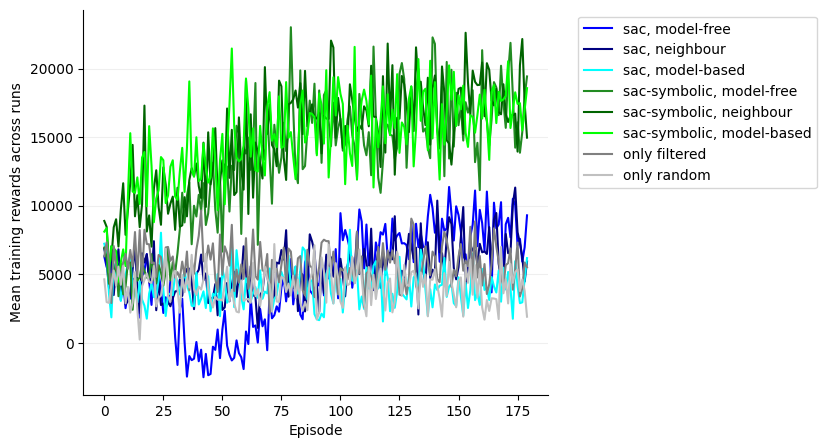

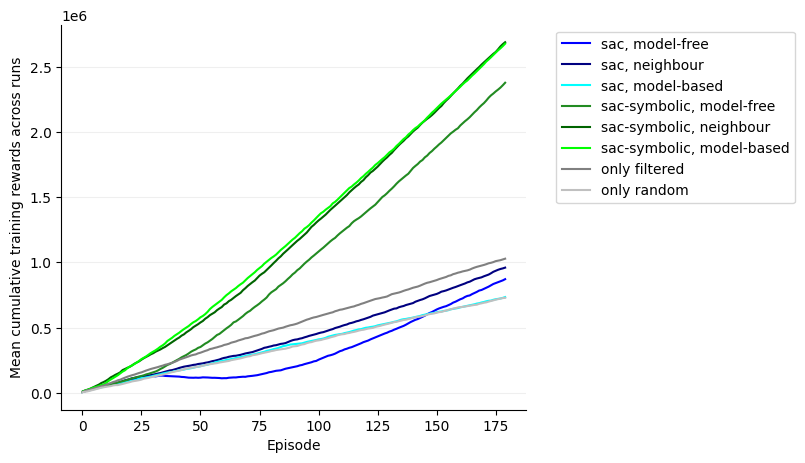

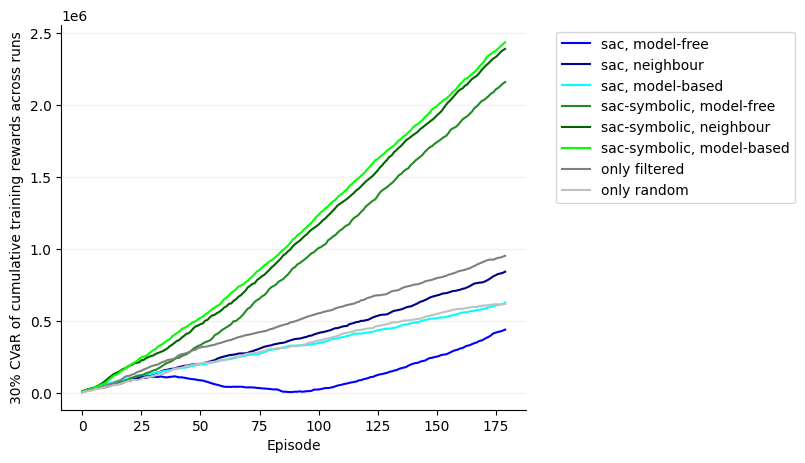

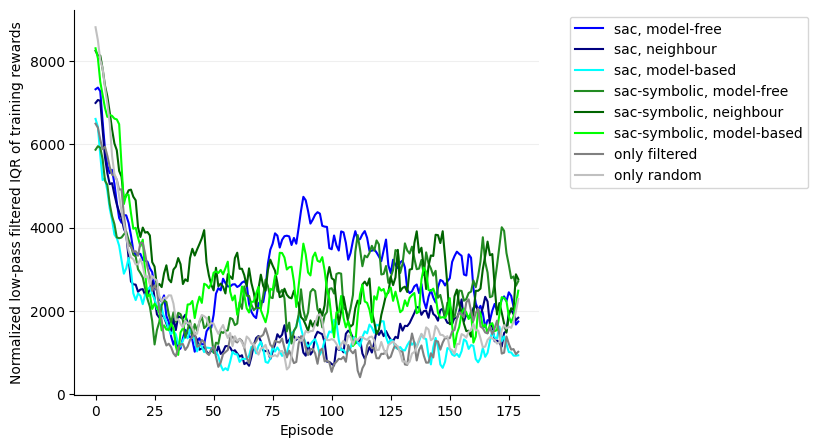

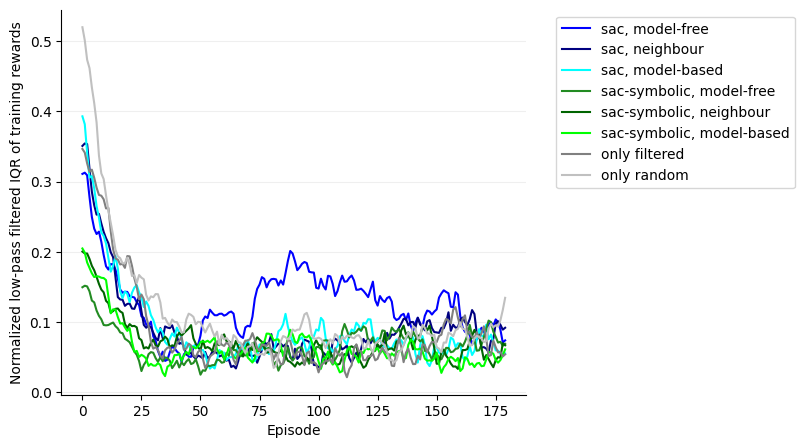

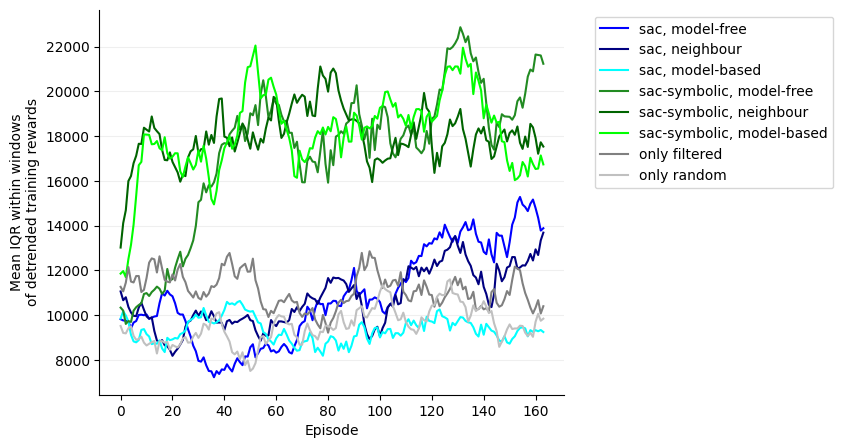

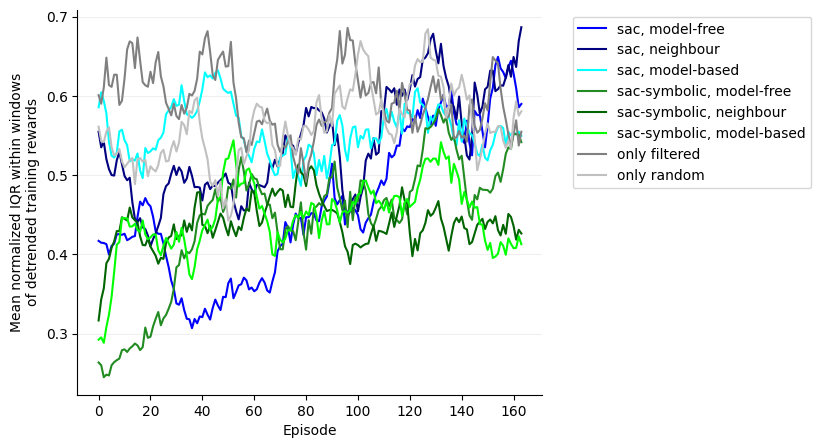

In [336]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import pickle
from functools import partial
omega_c = 0.01
T = 5

SEEDS = [101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120]
AGENT_TYPES = ["prioritized","sac","prioritized_symbolic","sac_symbolic"]
MBRL_KEYS = ["non-mbrl","mbrl","neighbour"]
GROUND_TYPES = [-1.0,0.0,1.0]
DRYWETS = [0.0,1.0]
data_type = "cumulative_training_rewards"

# mbrl_key = "non-mbrl"
# mbrl_key = "neighbour"
mbrl_key = "mbrl"

legend_dict = {
    "prioritized":"dqn",
    "sac":"sac",
    "prioritized_symbolic":"dqn-symbolic",
    "sac_symbolic":"sac-symbolic",
    "non-mbrl":"model-free",
    "neighbour":"neighbour",
    "mbrl":"model-based"
}

legend_dict_reverse = {
    "dqn":"prioritized",
    "sac":"sac",
    "dqn-symbolic":"prioritized_symbolic",
    "sac-symbolic":"sac_symbolic",
    "model-free":"non-mbrl",
    "neighbour":"neighbour",
    "model-based":"mbrl"
}

color_dict = {
    "dqn, model-free":"red",
    "sac, model-free":"blue",
    "dqn-symbolic, model-free":"yellow",
    "sac-symbolic, model-free":"forestgreen",
    "dqn, neighbour":"maroon",
    "sac, neighbour":"navy",
    "dqn-symbolic, neighbour":"darkgoldenrod",
    "sac-symbolic, neighbour":"darkgreen",
    "dqn, model-based":"magenta",
    "sac, model-based":"cyan",
    "dqn-symbolic, model-based":"darkorange",
    "sac-symbolic, model-based":"lime",
    "only filtered":"grey",
    "only random":"silver"
}


def generate_path_for_results(plot_tuple,ground_type, drywet, seed):
    if plot_tuple == "only filtered":
        path = f"experiments/evaluations/results/symbolic_only_filter_{ground_type}_{drywet}_{seed}.pickle"
        return path
    elif plot_tuple == "only random":
        path = f"experiments/evaluations/results/only_random_{ground_type}_{drywet}_{seed}.pickle"
        return path
    else:
        data_key_tuple = (legend_dict_reverse[plot_tuple.split(", ")[0]],legend_dict_reverse[plot_tuple.split(", ")[1]])
        path = f"experiments/evaluations/results/{data_key_tuple[0]}_{data_key_tuple[1]}_{ground_type}_{drywet}_{seed}.pickle"
        return path
    
# folder_name = "all_non-symbolic_nopt_baseline"
# agent_type = "sac"
# agent_type2 = "prioritized"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

# folder_name = "all_symbolic_nopt_baseline"
# agent_type = "sac_symbolic"
# agent_type2 = "prioritized_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

# folder_name = "dqn_all_nopt_baseline"
# agent_type = "prioritized"
# agent_type2 = "prioritized_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

folder_name = "sac_all_nopt_baseline"
agent_type = "sac"
agent_type2 = "sac_symbolic"
data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]



def plot_results_and_calculate_KPIs(seeds, ground_type, drywet, data_key_tuples, window_length, folder_name = None):
    partial_calculate_iqr_across_time_window = partial(calculate_iqr_across_time_window, window_length=window_length)
    plot_tuples = [f"{legend_dict[dk_tuple[0]]}, {legend_dict[dk_tuple[1]]}" for dk_tuple in data_key_tuples]+["only filtered","only random"]
    results_dict = {}
    for plot_tuple in plot_tuples:
        results_dict[plot_tuple] = {}
        rewards_across_runs = np.empty((0,180))
        cumulative_rewards_across_runs = np.empty((0,180))
        diffs_during_runs = np.empty((0,179))
        q95_max = -np.inf
        for seed in seeds:
            path = generate_path_for_results(plot_tuple, ground_type, drywet, seed)
            with open(path,"rb") as f:
                result = pickle.load(f)
            rewards = result["training_rewards"]
            diff_rewards = np.diff(rewards)
            cumulative_rewards = result["cumulative_training_rewards"]
            rewards_across_runs = np.vstack((rewards_across_runs,rewards))
            cumulative_rewards_across_runs = np.vstack((cumulative_rewards_across_runs,cumulative_rewards))
            diffs_during_runs = np.vstack((diffs_during_runs,diff_rewards))
            q95 = np.quantile(rewards,0.95)
            if q95 > q95_max:
                q95_max = q95

        mean_rewards_across_runs = np.mean(rewards_across_runs,axis=0)
        mean_cumulative_rewards_across_runs = np.mean(cumulative_rewards_across_runs,axis=0)
        cumulative_rewards_last_entry = cumulative_rewards_across_runs[:,-1].flatten()
        cumulative_lower_30_quantile = np.quantile(cumulative_rewards_last_entry,0.3)
        lowest_30_percent_cumulative_rewards = cumulative_rewards_across_runs[cumulative_rewards_last_entry <= cumulative_lower_30_quantile]
        results_dict[plot_tuple]["mean_rewards"] = mean_rewards_across_runs
        results_dict[plot_tuple]["mean_cumulative_rewards"] = mean_cumulative_rewards_across_runs
        results_dict[plot_tuple]["cvar_cumulative_rewards"] = np.mean(lowest_30_percent_cumulative_rewards, axis=0)
        iqr_across_runs = calculate_lpf_iqr(rewards_across_runs, omega_c, T)
        results_dict[plot_tuple]["iqr_across_runs"] = iqr_across_runs
        results_dict[plot_tuple]["iqr_across_runs_normalized"] = iqr_across_runs/q95_max
        iqrs_during_runs = np.apply_along_axis(partial_calculate_iqr_across_time_window,axis=1,arr=diffs_during_runs)
        mean_iqrs_during_runs = np.mean(iqrs_during_runs,axis=0)
        results_dict[plot_tuple]["mean_iqrs_during_runs"] = mean_iqrs_during_runs
        results_dict[plot_tuple]["mean_iqrs_during_runs_normalized"] = mean_iqrs_during_runs/q95_max


    if folder_name is not None:
        general_path = f"plots/{folder_name}"
        if not os.path.exists(general_path):
            os.makedirs(general_path)

    # Plot mean rewards
    plt.figure(figsize=(6,5))
    for plot_tuple in plot_tuples:
        plt.plot(results_dict[plot_tuple]["mean_rewards"],label=plot_tuple, alpha=1.0, color=color_dict[plot_tuple])
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("Mean training rewards across runs")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/mean_rewards.png"
        #save image without cropping off legend
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

    # Mean cumulative rewards
    plt.figure(figsize=(6,5))
    for plot_tuple in plot_tuples:
        plt.plot(results_dict[plot_tuple]["mean_cumulative_rewards"],label=plot_tuple, alpha=1.0, color=color_dict[plot_tuple])
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("Mean cumulative training rewards across runs")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/mean_cum_rewards.png"
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

    # CVaR cumulative rewards
    plt.figure(figsize=(6,5))
    for plot_tuple in plot_tuples:
        plt.plot(results_dict[plot_tuple]["cvar_cumulative_rewards"],label=plot_tuple, alpha=1.0, color=color_dict[plot_tuple])
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("30% CVaR of cumulative training rewards across runs")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/cvar_cum_rewards.png"
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

    # IQR across runs 
    plt.figure(figsize=(6,5))
    for plot_tuple in plot_tuples:
        plt.plot(results_dict[plot_tuple]["iqr_across_runs"],label=plot_tuple, alpha=1.0, color=color_dict[plot_tuple])
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("Normalized low-pass filtered IQR of training rewards")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/iqr_across_runs.png"
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

    # IQR across runs normalized
    plt.figure(figsize=(6,5))
    for plot_tuple in plot_tuples:
        plt.plot(results_dict[plot_tuple]["iqr_across_runs_normalized"],label=plot_tuple, alpha=1.0, color=color_dict[plot_tuple])
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("Normalized low-pass filtered IQR of training rewards")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/iqr_across_runs_norm.png"
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

    # IQR during runs
    plt.figure(figsize=(6,5))
    for plot_tuple in plot_tuples:
        plt.plot(results_dict[plot_tuple]["mean_iqrs_during_runs"],label=plot_tuple, alpha=1.0, color=color_dict[plot_tuple])
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("Mean IQR within windows\nof detrended training rewards")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/iqr_during_runs.png"
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

    # Normalized IQR during runs
    plt.figure(figsize=(6,5))
    for plot_tuple in plot_tuples:
        plt.plot(results_dict[plot_tuple]["mean_iqrs_during_runs_normalized"],label=plot_tuple, alpha=1.0, color=color_dict[plot_tuple])
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("Mean normalized IQR within windows\nof detrended training rewards")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/iqr_during_runs_norm.png"
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()



plot_results(SEEDS, ground_type = 0.0,drywet = 1.0, data_key_tuples = data_key_tuples, window_length = 15, folder_name = folder_name)

# Soil condition comparison

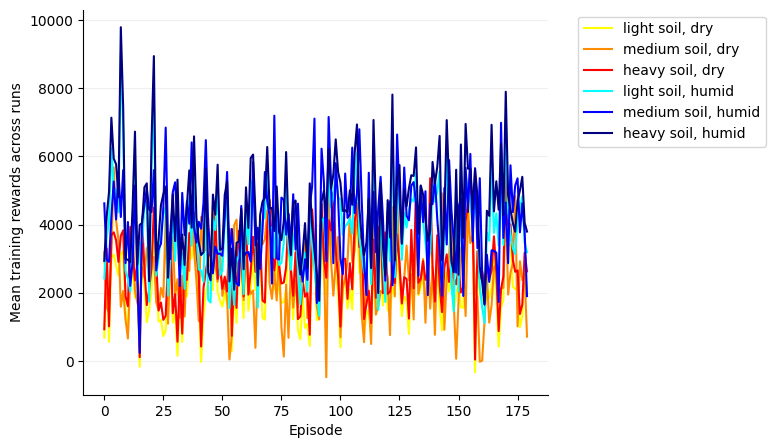

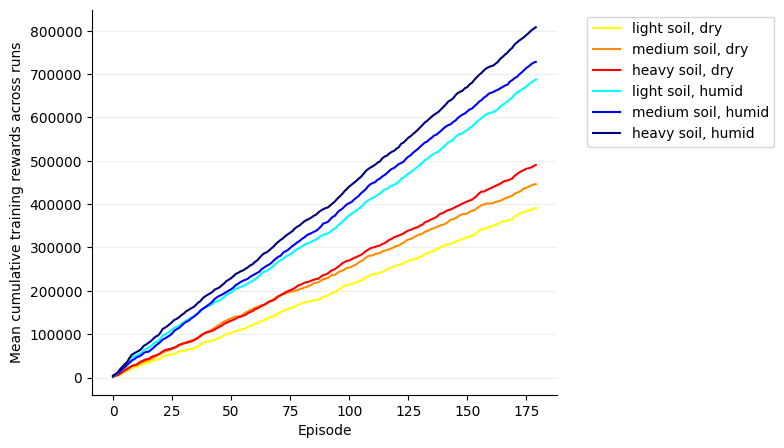

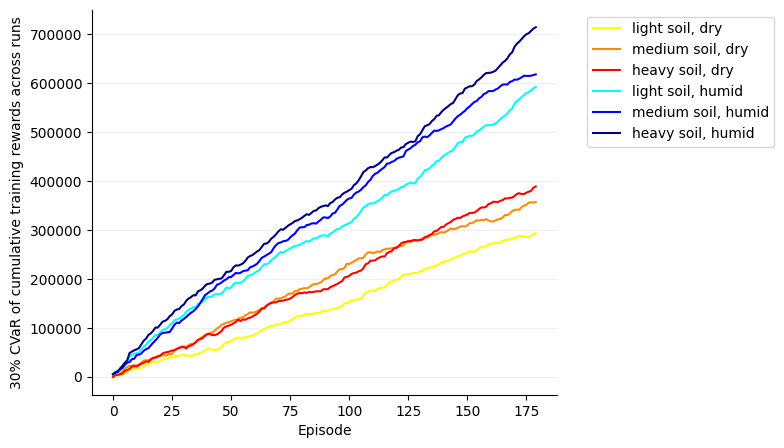

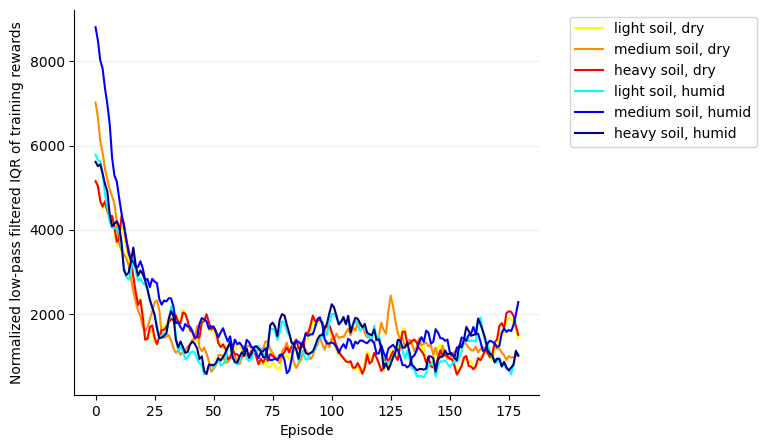

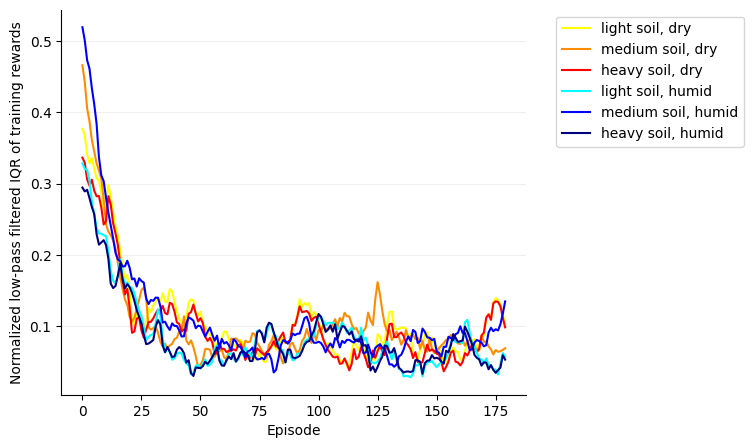

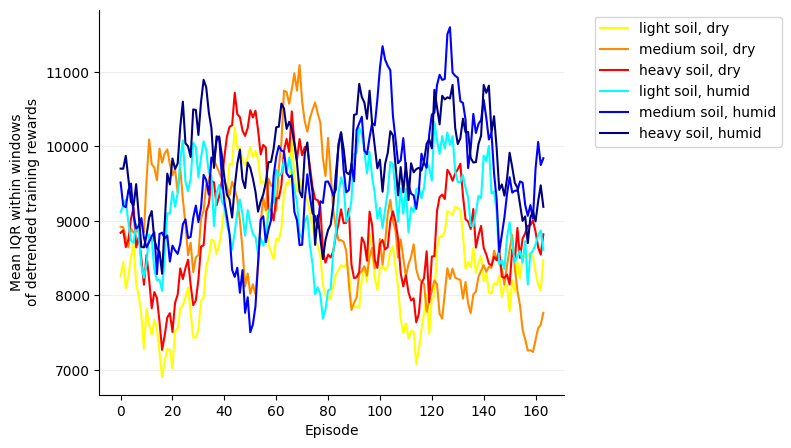

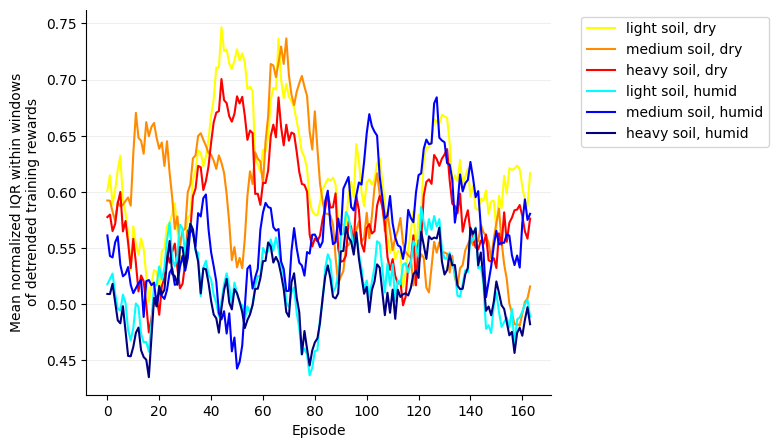

In [339]:
color_dict = {
    "light soil, humid":"cyan",
    "medium soil, humid":"blue",
    "heavy soil, humid":"navy",
    "light soil, dry":"yellow",
    "medium soil, dry":"darkorange",
    "heavy soil, dry":"red"
}

gt_dict = {
    -1.0:"light soil",
    0.0:"medium soil",
    1.0:"heavy soil"
}
drywet_dict = {
    0.0:"dry",
    1.0:"humid"
}

folder_name = "sac_symbolic_soil_conditions"
data_key_tuple = ("sac_symbolic","mbrl")
ground_types = [-1.0,0.0,1.0]
drywets = [0.0,1.0]

folder_name = "only_random_soil_conditions"
data_key_tuple = "only_random"
ground_types = [-1.0,0.0,1.0]
drywets = [0.0,1.0]

def plot_results_of_different_soil_conditions(seeds, ground_types, drywets, data_key_tuple, window_length, folder_name = None):
    partial_calculate_iqr_across_time_window = partial(calculate_iqr_across_time_window, window_length=window_length)
    results_dict = {}
    soil_dw_tuples = []
    for drywet in drywets:
        for ground_type in ground_types:
                soil_dw_tuple = f"{gt_dict[ground_type]}, {drywet_dict[drywet]}"
                soil_dw_tuples.append(soil_dw_tuple)
                results_dict[soil_dw_tuple] = {}
                rewards_across_runs = np.empty((0,180))
                cumulative_rewards_across_runs = np.empty((0,180))
                diffs_during_runs = np.empty((0,179))
                q95_max = -np.inf
                for seed in seeds:
                    if data_key_tuple == "only_random":
                        path = f"experiments/evaluations/results/only_random_{ground_type}_{drywet}_{seed}.pickle"
                    elif data_key_tuple == "only_filtered":
                        path = f"experiments/evaluations/results/symbolic_only_filter_{ground_type}_{drywet}_{seed}.pickle"
                    else:
                        path = f"experiments/evaluations/results/{data_key_tuple[0]}_{data_key_tuple[1]}_{ground_type}_{drywet}_{seed}.pickle"
                    with open(path,"rb") as f:
                        result = pickle.load(f)
                    rewards = result["training_rewards"]
                    diff_rewards = np.diff(rewards)
                    cumulative_rewards = result["cumulative_training_rewards"]
                    rewards_across_runs = np.vstack((rewards_across_runs,rewards))
                    cumulative_rewards_across_runs = np.vstack((cumulative_rewards_across_runs,cumulative_rewards))
                    diffs_during_runs = np.vstack((diffs_during_runs,diff_rewards))
                    q95 = np.quantile(rewards,0.95)
                    if q95 > q95_max:
                        q95_max = q95

                mean_rewards_across_runs = np.mean(rewards_across_runs,axis=0)
                mean_cumulative_rewards_across_runs = np.mean(cumulative_rewards_across_runs,axis=0)
                cumulative_rewards_last_entry = cumulative_rewards_across_runs[:,-1].flatten()
                cumulative_lower_30_quantile = np.quantile(cumulative_rewards_last_entry,0.3)
                lowest_30_percent_cumulative_rewards = cumulative_rewards_across_runs[cumulative_rewards_last_entry <= cumulative_lower_30_quantile]
                results_dict[soil_dw_tuple]["mean_rewards"] = mean_rewards_across_runs
                results_dict[soil_dw_tuple]["mean_cumulative_rewards"] = mean_cumulative_rewards_across_runs
                results_dict[soil_dw_tuple]["cvar_cumulative_rewards"] = np.mean(lowest_30_percent_cumulative_rewards, axis=0)
                iqr_across_runs = calculate_lpf_iqr(rewards_across_runs, omega_c, T)
                results_dict[soil_dw_tuple]["iqr_across_runs"] = iqr_across_runs
                results_dict[soil_dw_tuple]["iqr_across_runs_normalized"] = iqr_across_runs/q95_max
                iqrs_during_runs = np.apply_along_axis(partial_calculate_iqr_across_time_window,axis=1,arr=diffs_during_runs)
                mean_iqrs_during_runs = np.mean(iqrs_during_runs,axis=0)
                results_dict[soil_dw_tuple]["mean_iqrs_during_runs"] = mean_iqrs_during_runs
                results_dict[soil_dw_tuple]["mean_iqrs_during_runs_normalized"] = mean_iqrs_during_runs/q95_max


    if folder_name is not None:
        general_path = f"plots/{folder_name}"
        if not os.path.exists(general_path):
            os.makedirs(general_path)

    # Plot mean rewards
    plt.figure(figsize=(6,5))
    for soil_dw_tuple in soil_dw_tuples:
        plt.plot(results_dict[soil_dw_tuple]["mean_rewards"],label=soil_dw_tuple, alpha=1.0, color=color_dict[soil_dw_tuple])
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("Mean training rewards across runs")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/mean_rewards.png"
        #save image without cropping off legend
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

    # Mean cumulative rewards
    plt.figure(figsize=(6,5))
    for soil_dw_tuple in soil_dw_tuples:
        plt.plot(results_dict[soil_dw_tuple]["mean_cumulative_rewards"],label=soil_dw_tuple, alpha=1.0, color=color_dict[soil_dw_tuple])
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("Mean cumulative training rewards across runs")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/mean_cum_rewards.png"
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

    # CVaR cumulative rewards
    plt.figure(figsize=(6,5))
    for soil_dw_tuple in soil_dw_tuples:
        plt.plot(results_dict[soil_dw_tuple]["cvar_cumulative_rewards"],label=soil_dw_tuple, alpha=1.0, color=color_dict[soil_dw_tuple])
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("30% CVaR of cumulative training rewards across runs")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/cvar_cum_rewards.png"
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

    # IQR across runs 
    plt.figure(figsize=(6,5))
    for soil_dw_tuple in soil_dw_tuples:
        plt.plot(results_dict[soil_dw_tuple]["iqr_across_runs"],label=soil_dw_tuple, alpha=1.0, color=color_dict[soil_dw_tuple])
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("Normalized low-pass filtered IQR of training rewards")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/iqr_across_runs.png"
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

    # IQR across runs normalized
    plt.figure(figsize=(6,5))
    for soil_dw_tuple in soil_dw_tuples:
        plt.plot(results_dict[soil_dw_tuple]["iqr_across_runs_normalized"],label=soil_dw_tuple, alpha=1.0, color=color_dict[soil_dw_tuple])
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("Normalized low-pass filtered IQR of training rewards")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/iqr_across_runs_norm.png"
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

    # IQR during runs
    plt.figure(figsize=(6,5))
    for soil_dw_tuple in soil_dw_tuples:
        plt.plot(results_dict[soil_dw_tuple]["mean_iqrs_during_runs"],label=soil_dw_tuple, alpha=1.0, color=color_dict[soil_dw_tuple])
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("Mean IQR within windows\nof detrended training rewards")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/iqr_during_runs.png"
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

    # Normalized IQR during runs
    plt.figure(figsize=(6,5))
    for soil_dw_tuple in soil_dw_tuples:
        plt.plot(results_dict[soil_dw_tuple]["mean_iqrs_during_runs_normalized"],label=soil_dw_tuple, alpha=1.0, color=color_dict[soil_dw_tuple])
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("Mean normalized IQR within windows\nof detrended training rewards")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/iqr_during_runs_norm.png"
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()



plot_results_of_different_soil_conditions(SEEDS, ground_types = ground_types,drywets = drywets, data_key_tuple = data_key_tuple, window_length = 15, folder_name = folder_name)

# Pretraining comparison

dict_keys(['dqn-symbolic, model-free', 'dqn-symbolic, neighbour', 'dqn-symbolic, model-based'])
dict_keys(['dqn-symbolic, model-free', 'dqn-symbolic, neighbour', 'dqn-symbolic, model-based', 'only filtered', 'only random'])


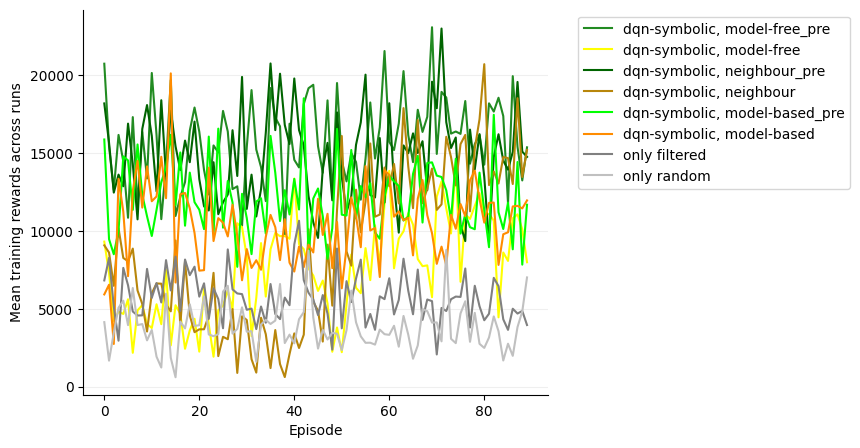

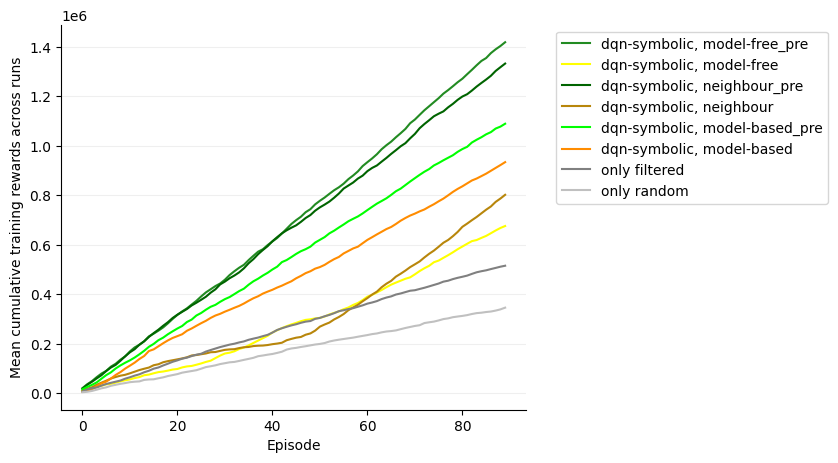

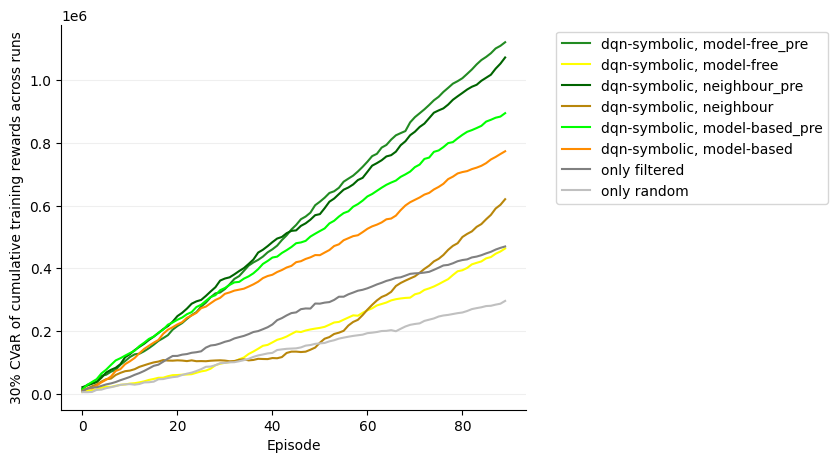

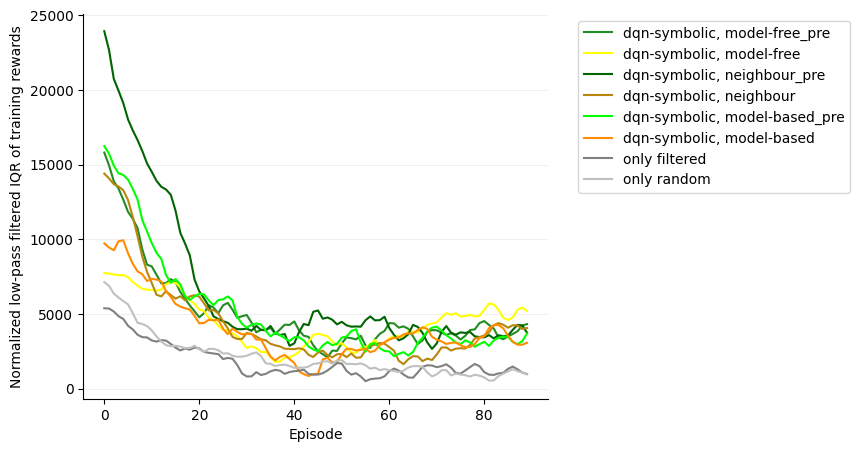

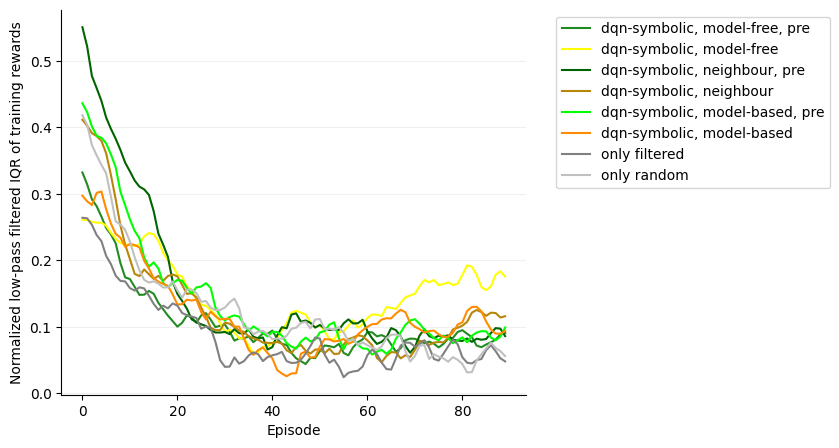

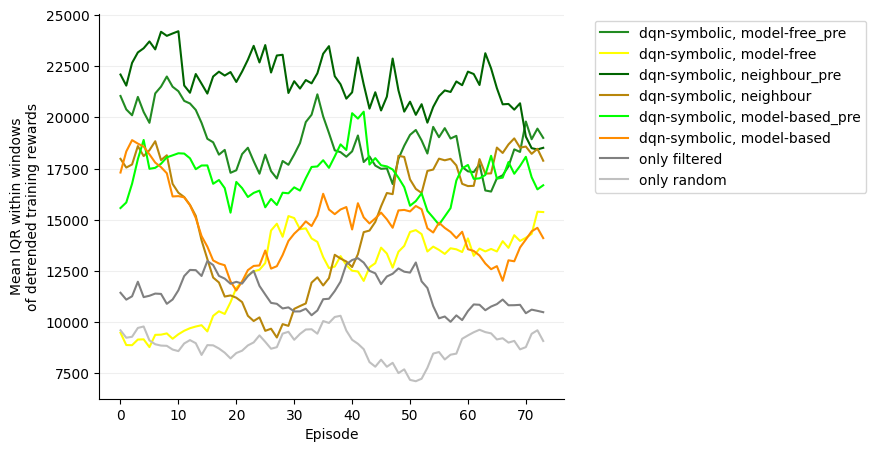

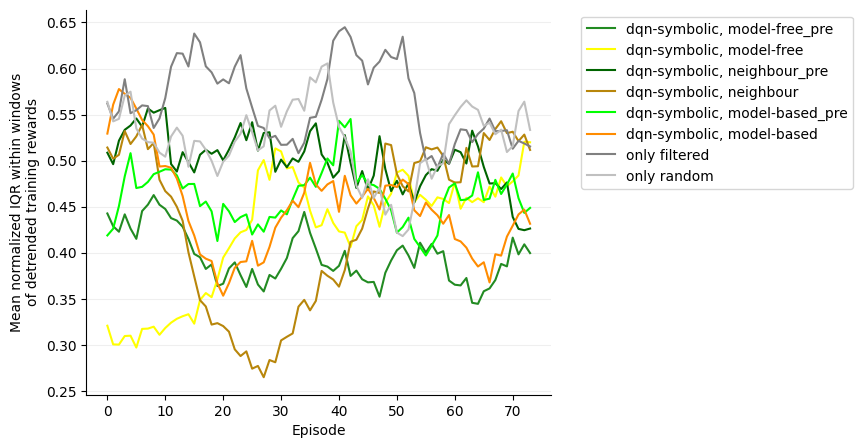

In [358]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import pickle
from functools import partial
omega_c = 0.01
T = 5

SEEDS = [101,102,103,104,105]
AGENT_TYPES = ["prioritized","sac","prioritized_symbolic","sac_symbolic"]
MBRL_KEYS = ["non-mbrl","mbrl","neighbour"]

legend_dict = {
    "prioritized":"dqn",
    "sac":"sac",
    "prioritized_symbolic":"dqn-symbolic",
    "sac_symbolic":"sac-symbolic",
    "non-mbrl":"model-free",
    "neighbour":"neighbour",
    "mbrl":"model-based"
}

legend_dict_reverse = {
    "dqn":"prioritized",
    "sac":"sac",
    "dqn-symbolic":"prioritized_symbolic",
    "sac-symbolic":"sac_symbolic",
    "model-free":"non-mbrl",
    "neighbour":"neighbour",
    "model-based":"mbrl"
}
color_dict = {
    "dqn, model-free":"red",
    "sac, model-free":"blue",
    "dqn-symbolic, model-free":"yellow",
    "sac-symbolic, model-free":"forestgreen",
    "dqn, neighbour":"maroon",
    "sac, neighbour":"navy",
    "dqn-symbolic, neighbour":"darkgoldenrod",
    "sac-symbolic, neighbour":"darkgreen",
    "dqn, model-based":"magenta",
    "sac, model-based":"cyan",
    "dqn-symbolic, model-based":"darkorange",
    "sac-symbolic, model-based":"lime",
    "only filtered":"grey",
    "only random":"silver"
}

color_dict_pretrained = {
    "pretrained":{
        "dqn, model-free":"blue",
        "sac, model-free":"blue",
        "dqn-symbolic, model-free":"forestgreen",
        "sac-symbolic, model-free":"forestgreen",
        "dqn, neighbour":"navy",
        "sac, neighbour":"navy",
        "dqn-symbolic, neighbour":"darkgreen",
        "sac-symbolic, neighbour":"darkgreen",
        "dqn, model-based":"cyan",
        "sac, model-based":"cyan",
        "dqn-symbolic, model-based":"lime",
        "sac-symbolic, model-based":"lime",
        "only filtered":"grey",
        "only random":"silver"
    },
    "base":{
        "dqn, model-free":"red",
        "sac, model-free":"red",
        "dqn-symbolic, model-free":"yellow",
        "sac-symbolic, model-free":"yellow",
        "dqn, neighbour":"maroon",
        "sac, neighbour":"maroon",
        "dqn-symbolic, neighbour":"darkgoldenrod",
        "sac-symbolic, neighbour":"darkgoldenrod",
        "dqn, model-based":"magenta",
        "sac, model-based":"magenta",
        "dqn-symbolic, model-based":"darkorange",
        "sac-symbolic, model-based":"darkorange",
        "only filtered":"grey",
        "only random":"silver"
    }

}


def generate_path_for_pretrained_results(plot_tuple, seed, test_seed):
    data_key_tuple = (legend_dict_reverse[plot_tuple.split(", ")[0]],legend_dict_reverse[plot_tuple.split(", ")[1]])
    path = f"experiments/evaluations/pretraining_results/{data_key_tuple[0]}_{data_key_tuple[1]}_{seed}_{test_seed}.pickle"
    return path
    
# folder_name = "all_non-symbolic_nopt_baseline"
# agent_type = "sac"
# agent_type2 = "prioritized"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

# folder_name = "all_symbolic_nopt_baseline"
# agent_type = "sac_symbolic"
# agent_type2 = "prioritized_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

# folder_name = "dqn_all_nopt_baseline"
# agent_type = "prioritized"
# agent_type2 = "prioritized_symbolic"
# data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]

folder_name = "dqn_symbolic_compare-pt_baseline"
agent_type = "prioritized_symbolic"
data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl")]



def plot_pretrained_results(seeds, data_key_tuples, window_length, folder_name = None, compare_flag = "only_pretrained"):
    ground_type = 0.0
    drywet = 1.0
    if compare_flag == "only_pretrained" or compare_flag == "both":
        n_episodes = 90
    else:
        n_episodes = 180
    partial_calculate_iqr_across_time_window = partial(calculate_iqr_across_time_window, window_length=window_length)
    plot_tuples = [f"{legend_dict[dk_tuple[0]]}, {legend_dict[dk_tuple[1]]}" for dk_tuple in data_key_tuples]+["only filtered","only random"]
    results_dict = {
        "pretrained":{},
        "base":{}
    }
    for plot_tuple in plot_tuples:
        if plot_tuple not in ["only filtered","only random"]:
            results_dict["pretrained"][plot_tuple] = {}
            rewards_across_runs = np.empty((0,n_episodes))
            cumulative_rewards_across_runs = np.empty((0,n_episodes))
            diffs_during_runs = np.empty((0,n_episodes-1))
            q95_max = -np.inf
            for seed in seeds:
                if compare_flag == "only_pretrained":
                    test_seeds = [seed+5,seed+10,seed+15,seed+20]
                else:
                    test_seeds = [seed+5,seed+10,seed+15]
                for test_seed in test_seeds:
                    path = generate_path_for_pretrained_results(plot_tuple, seed, test_seed)
                    with open(path,"rb") as f:
                        result = pickle.load(f)
                    rewards = result["training_rewards"]
                    diff_rewards = np.diff(rewards)
                    cumulative_rewards = result["cumulative_training_rewards"]
                    rewards_across_runs = np.vstack((rewards_across_runs,rewards))
                    cumulative_rewards_across_runs = np.vstack((cumulative_rewards_across_runs,cumulative_rewards))
                    diffs_during_runs = np.vstack((diffs_during_runs,diff_rewards))
                    q95 = np.quantile(rewards,0.95)
                    if q95 > q95_max:
                        q95_max = q95
            mean_rewards_across_runs = np.mean(rewards_across_runs,axis=0)
            mean_cumulative_rewards_across_runs = np.mean(cumulative_rewards_across_runs,axis=0)
            cumulative_rewards_last_entry = cumulative_rewards_across_runs[:,-1].flatten()
            cumulative_lower_30_quantile = np.quantile(cumulative_rewards_last_entry,0.3)
            lowest_30_percent_cumulative_rewards = cumulative_rewards_across_runs[cumulative_rewards_last_entry <= cumulative_lower_30_quantile]
            results_dict["pretrained"][plot_tuple]["mean_rewards"] = mean_rewards_across_runs
            results_dict["pretrained"][plot_tuple]["mean_cumulative_rewards"] = mean_cumulative_rewards_across_runs
            results_dict["pretrained"][plot_tuple]["cvar_cumulative_rewards"] = np.mean(lowest_30_percent_cumulative_rewards, axis=0)
            iqr_across_runs = calculate_lpf_iqr(rewards_across_runs, omega_c, T)
            results_dict["pretrained"][plot_tuple]["iqr_across_runs"] = iqr_across_runs
            results_dict["pretrained"][plot_tuple]["iqr_across_runs_normalized"] = iqr_across_runs/q95_max
            iqrs_during_runs = np.apply_along_axis(partial_calculate_iqr_across_time_window,axis=1,arr=diffs_during_runs)
            mean_iqrs_during_runs = np.mean(iqrs_during_runs,axis=0)
            results_dict["pretrained"][plot_tuple]["mean_iqrs_during_runs"] = mean_iqrs_during_runs
            results_dict["pretrained"][plot_tuple]["mean_iqrs_during_runs_normalized"] = mean_iqrs_during_runs/q95_max
        
        if compare_flag == "both" or plot_tuple in ["only filtered","only random"]:
            results_dict["base"][plot_tuple] = {}
            rewards_across_runs = np.empty((0,n_episodes))
            cumulative_rewards_across_runs = np.empty((0,n_episodes))
            diffs_during_runs = np.empty((0,n_episodes-1))
            q95_max = -np.inf
            for seed in seeds:
                test_seeds = [seed+5,seed+10,seed+15]
                for test_seed in test_seeds:
                    path = generate_path_for_results(plot_tuple, ground_type, drywet, test_seed)
                    with open(path,"rb") as f:
                        result = pickle.load(f)
                    rewards = result["training_rewards"][:n_episodes]
                    diff_rewards = np.diff(rewards)
                    cumulative_rewards = result["cumulative_training_rewards"][:n_episodes]
                    rewards_across_runs = np.vstack((rewards_across_runs,rewards))
                    cumulative_rewards_across_runs = np.vstack((cumulative_rewards_across_runs,cumulative_rewards))
                    diffs_during_runs = np.vstack((diffs_during_runs,diff_rewards))
                    q95 = np.quantile(rewards,0.95)
                    if q95 > q95_max:
                        q95_max = q95
            mean_rewards_across_runs = np.mean(rewards_across_runs,axis=0)
            mean_cumulative_rewards_across_runs = np.mean(cumulative_rewards_across_runs,axis=0)
            cumulative_rewards_last_entry = cumulative_rewards_across_runs[:,-1].flatten()
            cumulative_lower_30_quantile = np.quantile(cumulative_rewards_last_entry,0.3)
            lowest_30_percent_cumulative_rewards = cumulative_rewards_across_runs[cumulative_rewards_last_entry <= cumulative_lower_30_quantile]
            results_dict["base"][plot_tuple]["mean_rewards"] = mean_rewards_across_runs
            results_dict["base"][plot_tuple]["mean_cumulative_rewards"] = mean_cumulative_rewards_across_runs
            results_dict["base"][plot_tuple]["cvar_cumulative_rewards"] = np.mean(lowest_30_percent_cumulative_rewards, axis=0)
            iqr_across_runs = calculate_lpf_iqr(rewards_across_runs, omega_c, T)
            results_dict["base"][plot_tuple]["iqr_across_runs"] = iqr_across_runs
            results_dict["base"][plot_tuple]["iqr_across_runs_normalized"] = iqr_across_runs/q95_max
            iqrs_during_runs = np.apply_along_axis(partial_calculate_iqr_across_time_window,axis=1,arr=diffs_during_runs)
            mean_iqrs_during_runs = np.mean(iqrs_during_runs,axis=0)
            results_dict["base"][plot_tuple]["mean_iqrs_during_runs"] = mean_iqrs_during_runs
            results_dict["base"][plot_tuple]["mean_iqrs_during_runs_normalized"] = mean_iqrs_during_runs/q95_max

    print(results_dict["pretrained"].keys())
    print(results_dict["base"].keys())
    if folder_name is not None:
        general_path = f"plots/{folder_name}"
        if not os.path.exists(general_path):
            os.makedirs(general_path)

    # Plot mean rewards
    plt.figure(figsize=(6,5))
    for plot_tuple in plot_tuples:
        if compare_flag == "both":
            if plot_tuple not in ["only filtered","only random"]:
                plt.plot(results_dict["pretrained"][plot_tuple]["mean_rewards"],label=plot_tuple+"_pre", alpha=1.0, color=color_dict_pretrained["pretrained"][plot_tuple])
            
            plt.plot(results_dict["base"][plot_tuple]["mean_rewards"],label=plot_tuple, alpha=1.0, color=color_dict_pretrained["base"][plot_tuple])
        else:
            if plot_tuple not in ["only filtered","only random"]:
                plt.plot(results_dict["pretrained"][plot_tuple]["mean_rewards"],label=plot_tuple+"_pre", alpha=1.0, color=color_dict[plot_tuple])
            else:
                plt.plot(results_dict["base"][plot_tuple]["mean_rewards"],label=plot_tuple, alpha=1.0, color=color_dict[plot_tuple])    
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("Mean training rewards across runs")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/mean_rewards.png"
        #save image without cropping off legend
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

    # Mean cumulative rewards
    plt.figure(figsize=(6,5))
    for plot_tuple in plot_tuples:
        if compare_flag == "both":
            if plot_tuple not in ["only filtered","only random"]:
                plt.plot(results_dict["pretrained"][plot_tuple]["mean_cumulative_rewards"],label=plot_tuple+"_pre", alpha=1.0, color=color_dict_pretrained["pretrained"][plot_tuple])
            
            plt.plot(results_dict["base"][plot_tuple]["mean_cumulative_rewards"],label=plot_tuple, alpha=1.0, color=color_dict_pretrained["base"][plot_tuple])
        else:
            if plot_tuple not in ["only filtered","only random"]:
                plt.plot(results_dict["pretrained"][plot_tuple]["mean_cumulative_rewards"],label=plot_tuple+"_pre", alpha=1.0, color=color_dict[plot_tuple])
            else:
                plt.plot(results_dict["base"][plot_tuple]["mean_cumulative_rewards"],label=plot_tuple, alpha=1.0, color=color_dict[plot_tuple])  
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("Mean cumulative training rewards across runs")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/mean_cum_rewards.png"
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

    # CVaR cumulative rewards
    plt.figure(figsize=(6,5))
    for plot_tuple in plot_tuples:
        if compare_flag == "both":
            if plot_tuple not in ["only filtered","only random"]:
                plt.plot(results_dict["pretrained"][plot_tuple]["cvar_cumulative_rewards"],label=plot_tuple+"_pre", alpha=1.0, color=color_dict_pretrained["pretrained"][plot_tuple])
            
            plt.plot(results_dict["base"][plot_tuple]["cvar_cumulative_rewards"],label=plot_tuple, alpha=1.0, color=color_dict_pretrained["base"][plot_tuple])
        else:
            if plot_tuple not in ["only filtered","only random"]:
                plt.plot(results_dict["pretrained"][plot_tuple]["cvar_cumulative_rewards"],label=plot_tuple+"_pre", alpha=1.0, color=color_dict[plot_tuple])
            else:
                plt.plot(results_dict["base"][plot_tuple]["cvar_cumulative_rewards"],label=plot_tuple, alpha=1.0, color=color_dict[plot_tuple])  
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("30% CVaR of cumulative training rewards across runs")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/cvar_cum_rewards.png"
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

    # IQR across runs 
    plt.figure(figsize=(6,5))
    for plot_tuple in plot_tuples:
        if compare_flag == "both":
            if plot_tuple not in ["only filtered","only random"]:
                plt.plot(results_dict["pretrained"][plot_tuple]["iqr_across_runs"],label=plot_tuple+"_pre", alpha=1.0, color=color_dict_pretrained["pretrained"][plot_tuple])
            
            plt.plot(results_dict["base"][plot_tuple]["iqr_across_runs"],label=plot_tuple, alpha=1.0, color=color_dict_pretrained["base"][plot_tuple])
        else:
            if plot_tuple not in ["only filtered","only random"]:
                plt.plot(results_dict["pretrained"][plot_tuple]["iqr_across_runs"],label=plot_tuple+"_pre", alpha=1.0, color=color_dict[plot_tuple])
            else:
                plt.plot(results_dict["base"][plot_tuple]["iqr_across_runs"],label=plot_tuple, alpha=1.0, color=color_dict[plot_tuple]) 
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("Normalized low-pass filtered IQR of training rewards")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/iqr_across_runs.png"
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

    # IQR across runs normalized
    plt.figure(figsize=(6,5))
    for plot_tuple in plot_tuples:
        if compare_flag == "both":
            if plot_tuple not in ["only filtered","only random"]:
                plt.plot(results_dict["pretrained"][plot_tuple]["iqr_across_runs_normalized"],label=plot_tuple+", pre", alpha=1.0, color=color_dict_pretrained["pretrained"][plot_tuple])
            
            plt.plot(results_dict["base"][plot_tuple]["iqr_across_runs_normalized"],label=plot_tuple, alpha=1.0, color=color_dict_pretrained["base"][plot_tuple])
        else:
            if plot_tuple not in ["only filtered","only random"]:
                plt.plot(results_dict["pretrained"][plot_tuple]["iqr_across_runs_normalized"],label=plot_tuple+", pre", alpha=1.0, color=color_dict[plot_tuple])
            else:
                plt.plot(results_dict["base"][plot_tuple]["iqr_across_runs_normalized"],label=plot_tuple, alpha=1.0, color=color_dict[plot_tuple]) 
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("Normalized low-pass filtered IQR of training rewards")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/iqr_across_runs_norm.png"
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

    # IQR during runs
    plt.figure(figsize=(6,5))
    for plot_tuple in plot_tuples:
        if compare_flag == "both":
            if plot_tuple not in ["only filtered","only random"]:
                plt.plot(results_dict["pretrained"][plot_tuple]["mean_iqrs_during_runs"],label=plot_tuple+"_pre", alpha=1.0, color=color_dict_pretrained["pretrained"][plot_tuple])
            
            plt.plot(results_dict["base"][plot_tuple]["mean_iqrs_during_runs"],label=plot_tuple, alpha=1.0, color=color_dict_pretrained["base"][plot_tuple])
        else:
            if plot_tuple not in ["only filtered","only random"]:
                plt.plot(results_dict["pretrained"][plot_tuple]["mean_iqrs_during_runs"],label=plot_tuple+"_pre", alpha=1.0, color=color_dict[plot_tuple])
            else:
                plt.plot(results_dict["base"][plot_tuple]["mean_iqrs_during_runs"],label=plot_tuple, alpha=1.0, color=color_dict[plot_tuple]) 
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("Mean IQR within windows\nof detrended training rewards")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/iqr_during_runs.png"
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

    # Normalized IQR during runs
    plt.figure(figsize=(6,5))
    for plot_tuple in plot_tuples:
        if compare_flag == "both":
            if plot_tuple not in ["only filtered","only random"]:
                plt.plot(results_dict["pretrained"][plot_tuple]["mean_iqrs_during_runs_normalized"],label=plot_tuple+"_pre", alpha=1.0, color=color_dict_pretrained["pretrained"][plot_tuple])
            
            plt.plot(results_dict["base"][plot_tuple]["mean_iqrs_during_runs_normalized"],label=plot_tuple, alpha=1.0, color=color_dict_pretrained["base"][plot_tuple])
        else:
            if plot_tuple not in ["only filtered","only random"]:
                plt.plot(results_dict["pretrained"][plot_tuple]["mean_iqrs_during_runs_normalized"],label=plot_tuple+"_pre", alpha=1.0, color=color_dict[plot_tuple])
            else:
                plt.plot(results_dict["base"][plot_tuple]["mean_iqrs_during_runs_normalized"],label=plot_tuple, alpha=1.0, color=color_dict[plot_tuple]) 
    plt.grid(axis="y", alpha=0.2)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel("Episode")
    plt.ylabel("Mean normalized IQR within windows\nof detrended training rewards")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    if folder_name is not None:
        image_path = f"{general_path}/iqr_during_runs_norm.png"
        plt.savefig(image_path, bbox_inches='tight')
    plt.show()

plot_pretrained_results(SEEDS, data_key_tuples = data_key_tuples, window_length = 15, folder_name = folder_name, compare_flag = "both")

In [ ]:
SEEDS = [101,102,103,104,105]

AGENT_TYPES = ["prioritized","sac","prioritized_symbolic","sac_symbolic"]
MBRL_KEYS = ["non-mbrl","mbrl","neighbour"]
# data_type = "cumulative_training_rewards"
data_type = "cumulative_training_rewards"

mbrl_key = "non-mbrl"
# mbrl_key = "neighbour"
# mbrl_key = "mbrl"
import numpy as np
import matplotlib.pyplot as plt
import pickle


colors = ["red","blue","green","orange","yellow","purple","brown","pink"]
color_dict1 = {"prioritized":"red","sac":"blue","prioritized_symbolic":"green","sac_symbolic":"orange"}

# data_key_tuples = [("prioritized",mbrl_key),("sac",mbrl_key),("prioritized_symbolic",mbrl_key),("sac_symbolic",mbrl_key)]
agent_type = "sac_symbolic"
agent_type2 = "prioritized_symbolic"
data_key_tuples = [(agent_type,"non-mbrl"),(agent_type,"neighbour"),(agent_type,"mbrl"),(agent_type2,"non-mbrl"),(agent_type2,"neighbour"),(agent_type2,"mbrl")]
def plot_pretrained_results(seeds, data_key_tuples, data_type, plot_reference_flag=True):
    n_episodes = 90
    # make figsize 10x10
    plt.figure(figsize=(6,5))
    results_dict = {}
    for i_tuple, data_key_tuple in enumerate(data_key_tuples):
        result_over_seeds = np.empty((0,n_episodes))
        for seed in seeds:
            test_seeds = [seed+5,seed+10,seed+15,seed+20]
            for test_seed in test_seeds:
                path = f"experiments/evaluations/pretraining_results/{data_key_tuple[0]}_{data_key_tuple[1]}_{seed}_{test_seed}.pickle"
                with open(path,"rb") as f:
                    result = pickle.load(f)
                result = result[data_type]
                result_over_seeds = np.vstack((result_over_seeds,result))
        mean_result_over_seeds = np.mean(result_over_seeds,axis=0)
        lower_quantile = np.quantile(result_over_seeds,0.25,axis=0)
        upper_quantile = np.quantile(result_over_seeds,0.75,axis=0)
        x = np.arange(mean_result_over_seeds.shape[0])
        plt.plot(x,mean_result_over_seeds,label=str(data_key_tuple), alpha=0.8, color=colors[i_tuple])
        # plt.plot(x,lower_quantile,label=f"{str(data_key_tuple)}_lq", alpha=0.2, color=colors[i_tuple])
        # plt.plot(x,upper_quantile,label=f"{str(data_key_tuple)}_uq", alpha=0.2, color=colors[i_tuple])
        # print((result_over_seeds[0]==result_over_seeds[1]).all())
    if plot_reference_flag:
        result_over_seeds = np.empty((0,n_episodes))
        for seed in seeds:
            path = f"experiments/evaluations/results/symbolic_only_filter_{0.0}_{1.0}_{test_seed}.pickle"
            with open(path,"rb") as f:
                result = pickle.load(f)
            result = result[data_type][:n_episodes]
            result_over_seeds = np.vstack((result_over_seeds,result))
        mean_result_over_seeds = np.mean(result_over_seeds,axis=0)
        x = np.arange(mean_result_over_seeds.shape[0])
        plt.plot(x,mean_result_over_seeds,label="only filtered random", alpha=0.8, color="grey")
        result_over_seeds = np.empty((0,n_episodes))
        for seed in seeds:
            test_seeds = [seed+5,seed+10,seed+15,seed+20]
            for test_seed in test_seeds:
                path = f"experiments/evaluations/results/only_random_{0.0}_{1.0}_{seed}.pickle"
                with open(path,"rb") as f:
                    result = pickle.load(f)
                result = result[data_type][:n_episodes]
                result_over_seeds = np.vstack((result_over_seeds,result))
        mean_result_over_seeds = np.mean(result_over_seeds,axis=0)
        x = np.arange(mean_result_over_seeds.shape[0])
        plt.plot(x,mean_result_over_seeds,label="only random", alpha=0.8, color="black")
    # add horizontal major grid in lightgrey
    plt.grid(axis="y", alpha=0.2)
    # remove frame around plot on top and right side
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    plt.title("Cumulative Training Rewards of different agents\nafter pretraining on another environment")
    # add legend on the right side of the plot
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

plot_pretrained_results(SEEDS, data_key_tuples, data_type, plot_reference_flag = False)

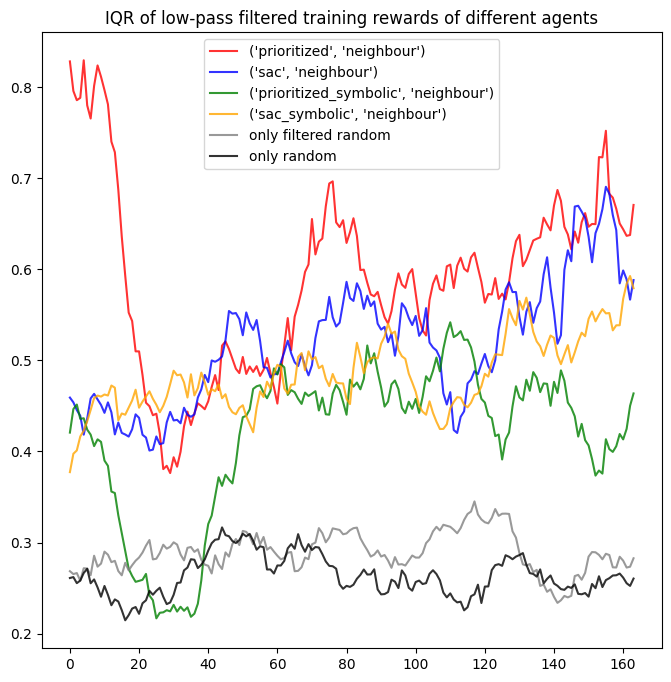

In [266]:
# def calculate_iqr_mean_performance_across_time_window(single_row, window_length):
#     # print(single_row.shape)
#     result = np.empty(single_row.shape[0]-window_length)
#     for i in range(window_length,single_row.shape[0]):
#         window = single_row[(i-window_length):i]
#         upper_quartile = np.quantile(window,0.75)
#         lower_quartile = np.quantile(window,0.25)
#         # calculate interquartile-mean
#         iqr_mean = np.mean(window[(window>lower_quartile) & (window<upper_quartile)])
#         # if abs(iqr) > 200000 or math.isnan(iqr):
#         #     print(upper_quartile,lower_quartile)
#         result[i-window_length] = iqr_mean
#     return result